<a href="https://colab.research.google.com/github/cedmasantos/Bootcamp-WomakersCode/blob/master/Estatistica_com_python/Desafio_final_Frequencias_Medidas_Cedma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Estatística Frequências e Medidas - Desafio Final



Participante: Cedma Firmino

Squad: Sônia Guimarães


Considerando a base de dados de enem_2023.json responda as questões
abaixo (os dados são fictícios).

Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante.

O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.


In [65]:
import pandas as pd
import numpy as np
## bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_json('/content/drive/MyDrive/Data_analytics/enem_2023.json')

In [35]:
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


1. Qual das disciplinas tem a maior amplitude de nota?


In [36]:
def describe_new(df):
    df1 = df.describe()
    df1.loc['amplitude'] = df1.loc['max'] - df1.loc['min']
    df1.loc['variancia'] = df1.loc['std']*df1.loc['std']
    return df1

In [37]:
describe_new(df)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000
amplitude,517.456317,474.019695,487.604568,488.077902,729.160035
variancia,7057.564698,6054.632515,6203.201190,7507.893239,13303.309244


In [38]:
print('A disciplina que tem a maior amplitude de nota é Redação')

A disciplina que tem a maior amplitude de nota é Redação


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)


In [39]:
df.isna().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [40]:
# ver a porcentagem de valores ausentes
df.isnull().sum() / df.shape[0]*100

Linguagens              10.3
Ciências humanas         6.4
Ciências da natureza    17.6
Matemática               7.6
Redação                 14.0
Sexo                     0.0
dtype: float64

In [42]:
# A média para cada uma das disciplinas
df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [43]:
# eliminar todas as entradas onde existam valores ausentes
df_median = df.dropna( axis=0)

# comparar o antes e o depois
print("Antes:\t{}".format(df.shape))
print("Depois:\t{}".format(df_median.shape))

Antes:	(1000, 6)
Depois:	(548, 6)


In [44]:
# A mediana para cada uma das disciplinas
df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].median()

Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64

3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:

a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?


In [45]:
#copiando o df

df_comp = df.copy()

In [46]:
# substituindo os NAN por 0
df_comp = df_comp.fillna(0)

In [47]:
df_comp.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,0.000000,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [48]:
df_comp['score_comp'] = df_comp['Linguagens'] *2 + df_comp['Ciências humanas'] *1 + df_comp['Ciências da natureza'] *1 + df_comp['Matemática']*4 + df_comp['Redação']*2

In [49]:
df_comp.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,score_comp
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,5150.201992
1,359.384608,642.084134,0.000000,412.205207,741.825256,Mulher,4493.324688
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,6231.924171
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,5765.260643
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,5437.651463


In [53]:
comp_500 = df_comp.sort_values(by='score_comp', ascending=False).iloc[:500]


In [55]:
comp_500.shape

(500, 7)

In [59]:
# média dos 500 estudantes mais bem colocados

comp_500['score_comp'].mean()

5618.7910649038495

In [60]:
# desvio padrão dos 500 estudantes mais bem colocados

comp_500['score_comp'].std()

359.94266397324276

4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [61]:
comp_40 = df_comp.sort_values(by='score_comp', ascending=False).iloc[:40]


In [62]:
# média dos 40 estudantes mais bem colocados

comp_40['score_comp'].mean()

6366.827415075188

In [63]:
# desvio padrão dos 40 estudantes mais bem colocados

comp_40['score_comp'].std()

171.97892417398424

5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [64]:
df.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


Teto do terceiro quartil

Linguagens: 571.635876

Matemática: 592.912963

6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?


Text(0.5, 1.0, 'Histograma: Redação')

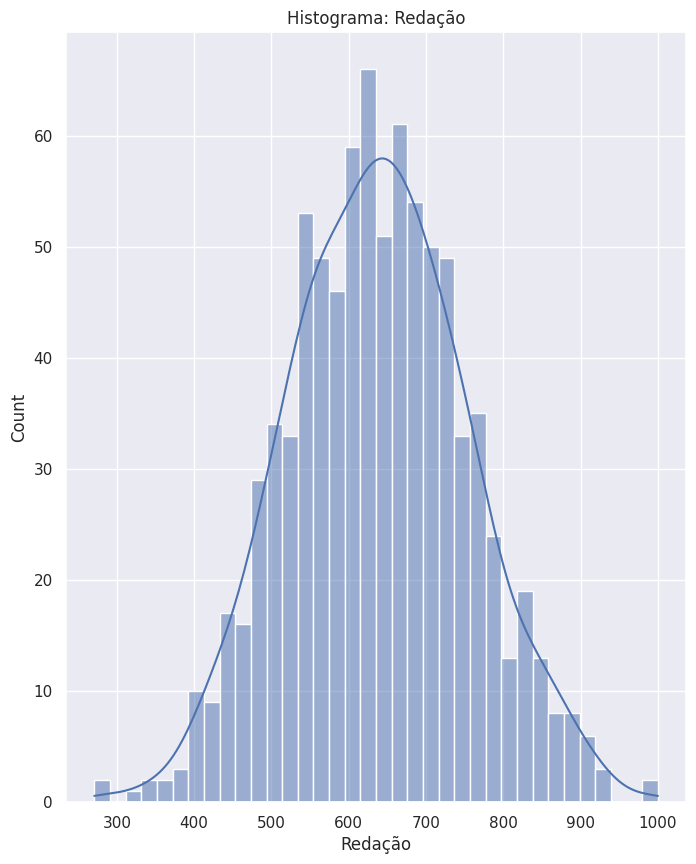

In [69]:
plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()
#create displots
plt.figure()
# kde = True permite a exibição da curva de densidade
sns.histplot(data = df, x=df['Redação'], binwidth=20, kde=True)

plt.title('Histograma: Redação')

Text(0.5, 1.0, 'Histograma: Linguagens')

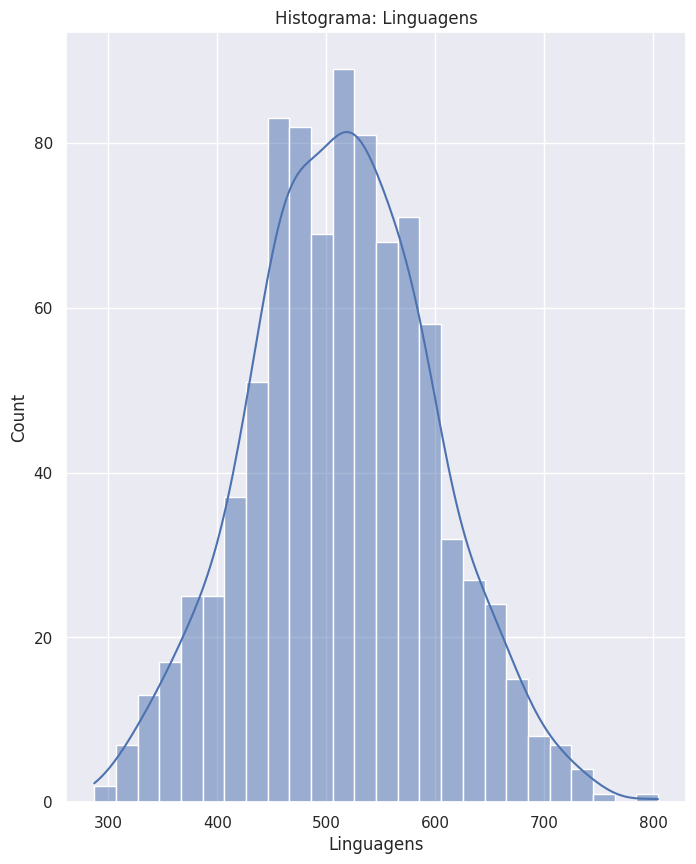

In [71]:
plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()
#create displots
plt.figure()
# kde = True permite a exibição da curva de densidade
sns.histplot(data = df, x=df['Linguagens'], binwidth=20, kde=True)
plt.title('Histograma: Linguagens')

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

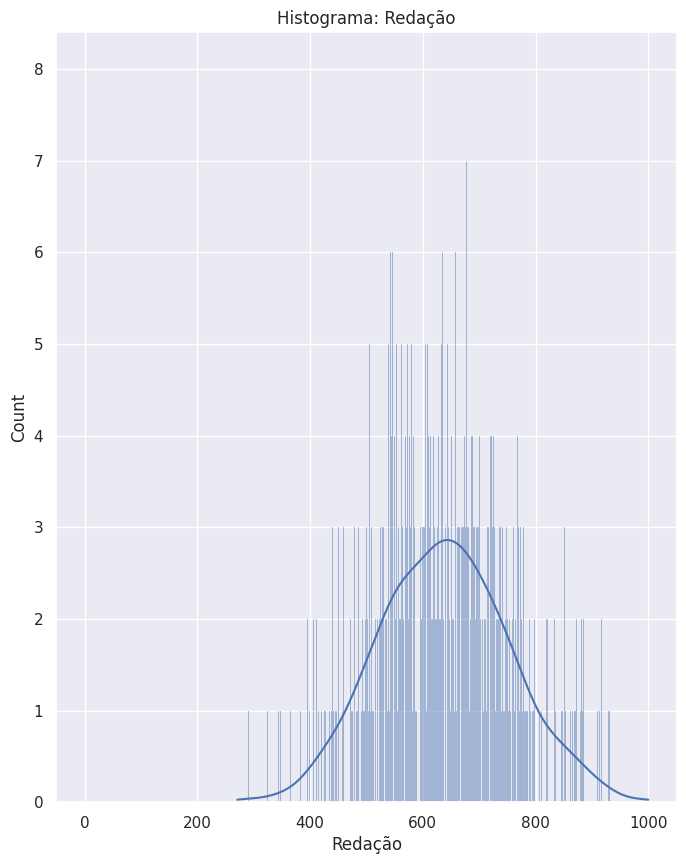

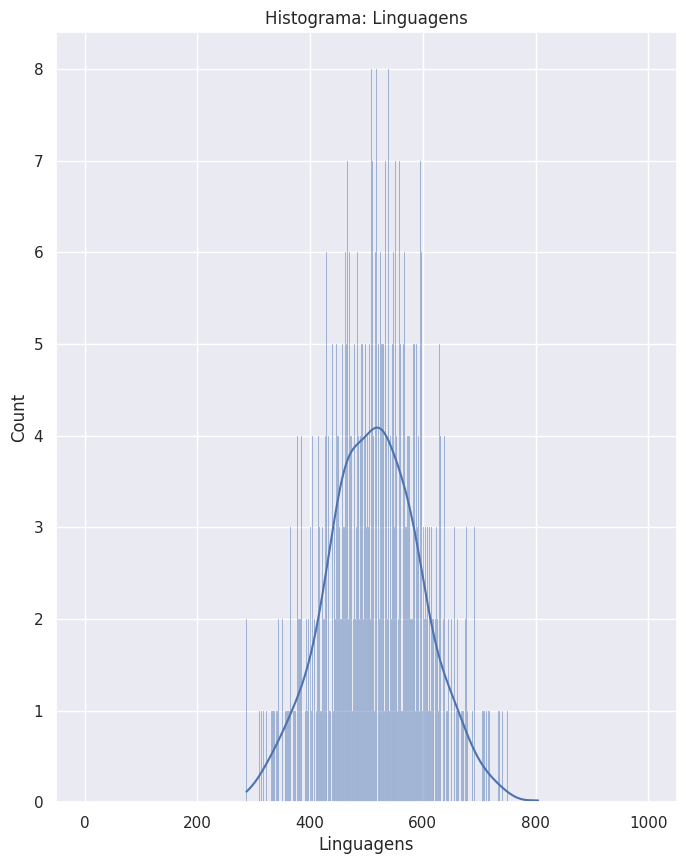

In [78]:
plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()
columns_to_plot = ['Redação', 'Linguagens']
#create displots
for column in columns_to_plot:
    plt.figure()
# kde = True permite a exibição da curva de densidade
    sns.histplot(data = df, x=column, bins= range(0, 1001), kde=True)
    plt.title('Histograma: ' +column)




8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.


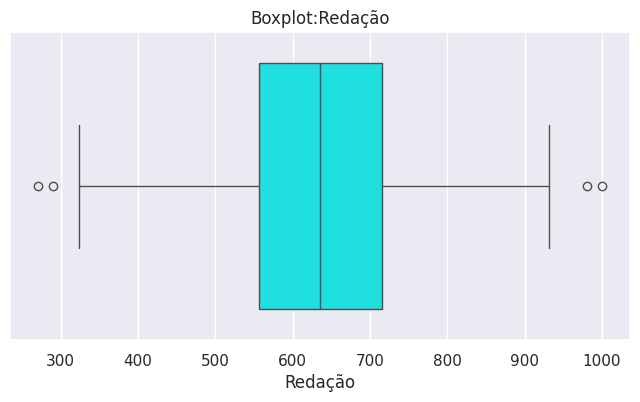

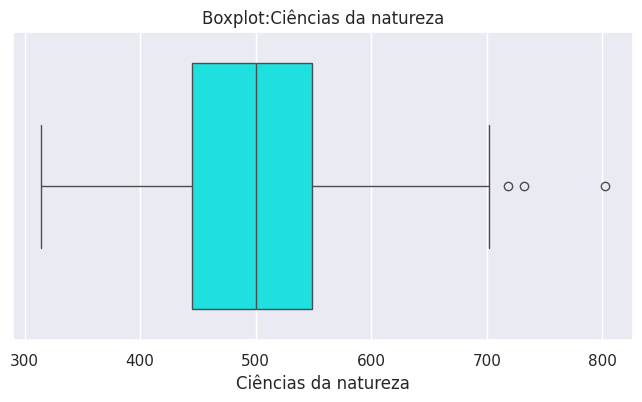

In [79]:
plt.rcParams['figure.figsize'] = [8,4]
sns.set_theme()
#Para cada uma das colunas numericas rodar o boxplot
columns_to_plot = ['Redação', 'Ciências da natureza']
for column in columns_to_plot:
  plt.figure()
  sns.boxplot(data = df, x = column, color = 'cyan', showfliers=True)
  plt.title('Boxplot:' +column )

 IQR é  194.12699639257505
O numero de outliers em Redação foi de:  141
 IQR é  145.67948828892509
O numero de outliers em Ciências da natureza foi de:  177


<Figure size 1000x600 with 0 Axes>

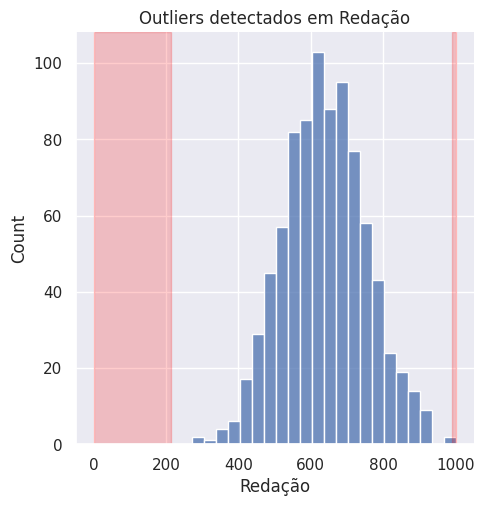

<Figure size 1000x600 with 0 Axes>

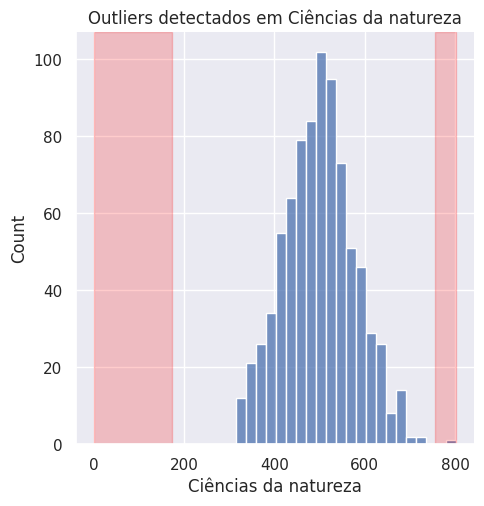

In [86]:


def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print(' IQR é ',iqr)
   # print('Valor minimo', lower)
   # print('Valor maximo', upper)
    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
    print('O numero de outliers em {} foi de: '.format(colname), len(outliers))
    return lower, upper, outliers


for column in columns_to_plot:
  lower, upper, out =  find_outlier_iqr(df_comp, column)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(df[column], kde=False)
    plt.axvspan(xmin = lower,xmax= df_comp[column].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= df_comp[column].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))



In [82]:
df_comp.shape


(1000, 7)

9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)


In [89]:


def replace_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print(' IQR é ',iqr)
   # print('Valor minimo', lower)
   # print('Valor maximo', upper)
    outliers = []
    val = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
 #       print('O numero de outliers em {} foi de: '.format(colname), len(outliers))
        val.append(np.nan)
      else:
        val.append(i)
    print('O numero de outliers em {} foi de: '.format(colname), len(outliers))
    return val

df1 = df_comp.copy()

for column in columns_to_plot:
  df1[column]=  replace_outlier_iqr(df1, column)


 IQR é  194.12699639257505
O numero de outliers em Redação foi de:  141
 IQR é  145.67948828892509
O numero de outliers em Ciências da natureza foi de:  177


In [113]:
#verificando a existencia de na
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            1000 non-null   float64
 1   Ciências humanas      1000 non-null   float64
 2   Ciências da natureza  823 non-null    float64
 3   Matemática            1000 non-null   float64
 4   Redação               859 non-null    float64
 5   Sexo                  1000 non-null   object 
 6   score_comp            1000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 94.8+ KB


In [92]:
#removendo os outliers substituidos por na
df1_clean = df1.dropna()

In [114]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 998
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            705 non-null    float64
 1   Ciências humanas      705 non-null    float64
 2   Ciências da natureza  705 non-null    float64
 3   Matemática            705 non-null    float64
 4   Redação               705 non-null    float64
 5   Sexo                  705 non-null    object 
 6   score_comp            705 non-null    float64
dtypes: float64(6), object(1)
memory usage: 44.1+ KB


In [107]:
#média das notas de redação sem outliers
df_clean['Redação'].mean()


637.7835320695873

In [94]:
#média das notas de redação com outliers
df['Redação'].mean()


637.7835320695872

In [95]:
#média das notas de redação sem outliers
df_clean['Ciências da natureza'].mean()

501.81849339473763

In [96]:
#média das notas de redação com outliers
df['Ciências da natureza'].mean()

499.3155828489798

In [112]:
if (((df_clean['Ciências da natureza'].mean()-df['Ciências da natureza'].mean())/df['Ciências da natureza'].mean()) <0.05) :
  print ("A remoção dos outliers não impactou na média geral de Ciências da natureza")
else:
  print ("A remoção dos outliers impactou na média geral de Ciências da natureza")

A remoção dos outliers não impactou na média geral de Ciências da natureza


In [110]:
if (((df_clean['Redação'].mean() - df['Redação'].mean())/df['Redação'].mean()) <0.05) :
  print ("A remoção dos outliers não impactou na média geral Redação")
else:
  print ("A remoção dos outliers impactou na média geral de redação")

A remoção dos outliers não impactou na média geral Redação


10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 87.0+ KB


In [125]:
# substituindo os NAN pela média
df_media = df.copy()
for column in df_media.select_dtypes(include=np.number).columns:
  column_media = df[column].mean()
  df_media[column] = df_media[column].fillna(column_media)


In [129]:
df.mean()

<ipython-input-129-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [130]:
df_media.mean()

<ipython-input-130-49a7ab7ff331>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_media.mean()


Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Não houve diferença na média geral.

In [161]:
df_moda = df.copy()
df_moda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 87.0+ KB


In [162]:
# substituindo os NAN pela moda

for column in df_media.select_dtypes(include=np.number).columns:
  column_moda = df[column].mode()
  print (column_moda)
  df_moda[column] = df_moda[column].fillna( value=column_moda)

0    287.0
Name: Linguagens, dtype: float64
0    289.9
Name: Ciências humanas, dtype: float64
0    314.4
Name: Ciências da natureza, dtype: float64
0    319.8
Name: Matemática, dtype: float64
0       270.839965
1       290.308608
2       324.222553
3       343.898504
4       347.897227
          ...     
855     928.835434
856     929.654524
857     931.305275
858     981.016553
859    1000.000000
Name: Redação, Length: 860, dtype: float64


In [163]:
df_moda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Linguagens            0 non-null      object
 1   Ciências humanas      0 non-null      object
 2   Ciências da natureza  0 non-null      object
 3   Matemática            0 non-null      object
 4   Redação               0 non-null      object
 5   Sexo                  1000 non-null   object
dtypes: object(6)
memory usage: 87.0+ KB


In [138]:
df.mean()

<ipython-input-138-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [139]:
df_moda.mean()

<ipython-input-139-4bb895085dcc>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_moda.mean()


Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.815381
dtype: float64

In [140]:
df.std()

<ipython-input-140-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Linguagens               84.009313
Ciências humanas         77.811519
Ciências da natureza     78.760404
Matemática               86.648100
Redação                 115.339972
dtype: float64

In [141]:
df_moda.std()

<ipython-input-141-4b16d45fcd82>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_moda.std()


Linguagens               84.009313
Ciências humanas         77.811519
Ciências da natureza     78.760404
Matemática               86.648100
Redação                 114.038611
dtype: float64

In [142]:
# substituindo os NAN pela mediana
df_mediana = df.copy()
for column in df_media.select_dtypes(include=np.number).columns:
  column_mediana = df_comp[column].mode()
  df_mediana[column] = df_mediana[column].fillna(column_mediana)

In [143]:
df.mean()

<ipython-input-143-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [144]:
df_mediana.mean()

<ipython-input-144-9600ad694df7>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mediana.mean()


Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [ ]:
# preencher valores ausentes em `ride_duration` com a mediana
rd_median = df_clean.ride_duration.median()
df_clean = df_clean.fillna({"ride_duration": rd_median})

# ver valores ausentes
df_clean.isnull().sum()